# Introduction 

   “If you talk to a man in a language he understands, that goes to his head. If you talk to him in his own language, that goes to his heart.” – Nelson Mandela
   The skills of translation are becoming ever more important and desirable. Today’s multicultural and multilingual society demands effective, efficient, and empathetic communication between languages and cultures. That’s important for various reasons.
     i)  Not Everybody Speaks English(Global language).
    ii)  It Enables A Global Economy.
   iii)  The Spread of Information and Ideas.
       
Problem statement:
    The objective is to convert a Engish sentence to its Hindi counterpart using a Neural Machine Translation (NMT) system.
The goal is to build a model with the help of neural networks, using python (precisely Tensorflow, keras), which translates the text into desired language. But, for this model to build, we need good size of the pre-translated data and then data should be prepared for the further process of building the model.
    
Background :
    "Machine Translation" is generally known as MT (abbreviation), and it deals with the investigation of the use of software to translate text or speech from one language to another. 
      i) Machine Translation is not a new idea, it was proposed few decades before, more precisely around 1949 in Warren weaver's Memorandum on Translation. 
     ii) It is also said that this idea of universal language with equivalent idea in different tongues sharing one symbol is proposed by Rene Descartes in 1629.
    iii) From 1949 on wards there is a long list of researchers contributed to this idea in different ways and it is materialized in 21st century through the advancement of modern scientific computation.
    Human translation can be explained as decoding the meaning of the text from the source language and re-encoding the meaning into the target language.As this process is concerned, one should know the basic rules of both the languages (source language and target language), precisely the {Grammar}. This suggests that it involves a lot of human intuitions. To carry out this using machine (computationally) is a big challenge. So, for making this possible, it cannot be done automatocally, a kind of human aid is needed. So, the different approaches have evolved with the time to attain the needed accuracy.
    There are some of the approaches are mentioned below
    1) Rule-Based machine translation 
    2) Statistical machine translation
    3) Example based machine translation
    4) Hybrid machine translation 
    5) Neural machine translation
    
dataset explanation:
    The data taken is for English to Hindi (hin-eng.txt) , it constitutes of 1044268 sentences. The sentences are split into words and tokenized and then used for further process.

Overall approach and major steps:
    Implementation of Sequence-to-Sequence (Seq2Seq) Modeling in Python using Keras.
Major steps to follow:
    1) Import the Required Libraries
    2) Read the Data into our IDE
    3) Text Cleaning
    4) Text to Sequence Conversion
    5) Model Building
    
The dependent packages:
    1) Tensorflow
    2) keras
    3) string
    4) re
    5) numpy
    6) pandas
    7) matplotlib

In [31]:
import tensorflow 
import keras

In [32]:
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

Our data is a text file (.txt) of English-Hindi sentence pairs. First, we will read the file using the function defined below.

In [33]:
# function to read raw text file
def read_text(filename):
        # open the file
        file = open(filename, mode='rt', encoding='utf-8')
        
        # read all text
        text = file.read()
        file.close()
        return text

Let’s define another function to split the text into English-Hindi pairs separated by ‘\n’.
We’ll then split these pairs into English sentences and Hindi sentences respectively.

In [34]:
# split a text into sentences
def to_lines(text):
      sents = text.strip().split('\n')
      sents = [i.split('\t') for i in sents]
      return sents

We can now use these functions to read the text into an array in our desired format.

In [35]:
data = read_text("hin-eng.txt")
hin_eng = to_lines(data)
hin_eng = array(hin_eng)

Let’s first take a look at our data. This will help us decide which pre-processing steps to adopt.

In [36]:
hin_eng

array([['\ufeffa babe in the woods ', 'जंगल में एक बच्चा '],
       ['a baby at her breast ', 'उसके स्तन में एक बच्चा '],
       ['a baby brother or sister ', 'एक बच्चा भाई या बहन '],
       ...,
       ['zoos and aquariums in silver ',
        'चिड़ियाघर और एक्वैरियम चांदी में '],
       ['zukerman joins us now to ',
        'ज़ुकर्मन अब हमें इसमें शामिल हो जाता है '],
       ['zulu nationalist inkatha freedom party ',
        'ज़ुलू राष्ट्रवादी इनकाथा स्वतंत्रता पार्टी']], dtype='<U174')

In [37]:
len(hin_eng)

1044268

The actual data contains over 1044268 sentence-pairs. However, we will use full data. 
You can change this number as per your system’s computation power.

In [38]:
hin_eng =hin_eng[:1044268,:]

We will get rid of the punctuation marks and then convert all the text to lower case.

In [39]:
# Remove punctuation
hin_eng[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in hin_eng[:,0]]
hin_eng[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in hin_eng[:,1]]

hin_eng

array([['\ufeffa babe in the woods ', 'जंगल में एक बच्चा '],
       ['a baby at her breast ', 'उसके स्तन में एक बच्चा '],
       ['a baby brother or sister ', 'एक बच्चा भाई या बहन '],
       ...,
       ['zoos and aquariums in silver ',
        'चिड़ियाघर और एक्वैरियम चांदी में '],
       ['zukerman joins us now to ',
        'ज़ुकर्मन अब हमें इसमें शामिल हो जाता है '],
       ['zulu nationalist inkatha freedom party ',
        'ज़ुलू राष्ट्रवादी इनकाथा स्वतंत्रता पार्टी']], dtype='<U174')

In [40]:
# convert text to lowercase
for i in range(len(hin_eng)):
    hin_eng[i,0] = hin_eng[i,0].lower()
    hin_eng[i,1] = hin_eng[i,1].lower()

hin_eng

array([['\ufeffa babe in the woods ', 'जंगल में एक बच्चा '],
       ['a baby at her breast ', 'उसके स्तन में एक बच्चा '],
       ['a baby brother or sister ', 'एक बच्चा भाई या बहन '],
       ...,
       ['zoos and aquariums in silver ',
        'चिड़ियाघर और एक्वैरियम चांदी में '],
       ['zukerman joins us now to ',
        'ज़ुकर्मन अब हमें इसमें शामिल हो जाता है '],
       ['zulu nationalist inkatha freedom party ',
        'ज़ुलू राष्ट्रवादी इनकाथा स्वतंत्रता पार्टी']], dtype='<U174')

A Seq2Seq model requires that we convert both the input and 
the output sentences into integer sequences of fixed length.

But before we do that, let’s visualise the length of the sentences.
We will capture the lengths of all the sentences in two separate lists for English and Hindi, respectively.

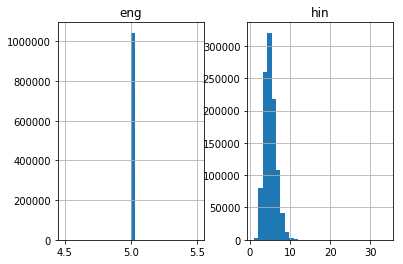

In [41]:
# empty lists
eng_l = []
hin_l = []

# populate the lists with sentence lengths
for i in hin_eng[:,0]:
      eng_l.append(len(i.split()))

for i in hin_eng[:,1]:
      hin_l.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_l, 'hin':hin_l})

length_df.hist(bins = 30)
plt.show()

In [42]:
hin_eng[115,0].split()

['a', 'balance', 'between', 'the', 'two']

In [43]:
len(hin_eng[115,0].split())

5

Quite intuitive – the maximum length of the Hindi sentences is 11 and that of the English phrases is 5.

Next, vectorize our text data by using Keras’s Tokenizer() class. 
It will turn our sentences into sequences of integers. 
We can then pad those sequences with zeros to make all the sequences of the same length.

Note that we will prepare tokenizers for both the Hindi and English sentences:

In [16]:
# function to build a tokenizer
def tokenization(lines):
      tokenizer = Tokenizer()
      tokenizer.fit_on_texts(lines)
      return tokenizer

In [44]:
# prepare english tokenizer
eng_tokenizer = tokenization(hin_eng[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 11
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 24864


In [45]:
# prepare Deutch tokenizer
hin_tokenizer = tokenization(hin_eng[:, 1])
hin_vocab_size = len(hin_tokenizer.word_index) + 1

hin_length =11
print('hindi Vocabulary Size: %d' % hin_vocab_size)

hindi Vocabulary Size: 26116


The below code block contains a function to prepare the sequences. 
It will also perform sequence padding to a maximum sentence length as mentioned above.

In [46]:
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
         # integer encode sequences
         seq = tokenizer.texts_to_sequences(lines)
         # pad sequences with 0 values
         seq = pad_sequences(seq, maxlen=length, padding='post')
         return seq

# ModelBuilding

We will now split the data into train and test set for model training and evaluation, respectively.

In [47]:
import sklearn

In [48]:
from sklearn.model_selection import train_test_split

# split data into train and test set
train, test = train_test_split(hin_eng, test_size=0.1, random_state = 12)

It’s time to encode the sentences. We will encode English sentences as the input sequences
and Hindi sentences as the target sequences. This has to be done for both the train and test datasets.

In [49]:
# prepare training data
trainX = encode_sequences(hin_tokenizer, hin_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])

# prepare validation data
testX = encode_sequences(hin_tokenizer, hin_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])

We’ll start off by defining our Seq2Seq model architecture:

For the encoder, we will use an embedding layer and an LSTM layer
For the decoder, we will use another LSTM layer followed by a dense layer

In [50]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
      model = Sequential()
      model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
      model.add(LSTM(units))
      model.add(RepeatVector(out_timesteps))
      model.add(LSTM(units, return_sequences=True))
      model.add(Dense(out_vocab, activation='softmax'))
      return model

We are using the RMSprop optimizer in this model as it’s usually a good choice when working with recurrent neural networks.

In [51]:
# model compilation
model = define_model(eng_vocab_size, hin_vocab_size, eng_length, hin_length, 512)

In [52]:
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

Please note that we have used ‘sparse_categorical_crossentropy‘ as the loss function.
This is because the function allows us to use the target sequence as is, instead of the one-hot encoded format. 
One-hot encoding the target sequences using such a huge vocabulary might consume our system’s entire memory.

We are all set to start training our model!

We will train it for 12 epochs and with a batch size of 512 with a validation split of 10%.
90% of the data will be used for training the model and the rest for evaluating it.
You may change and play around with these hyperparameters.

We will also use the ModelCheckpoint() function to save the model with the lowest validation loss.

In [58]:
filename = 'model.h1.13_apr_19'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
history = model.fit(trainY, trainX.reshape(trainX.shape[0], trainX.shape[1], 1),
                    epochs=12, batch_size=512, validation_split = 0.1,callbacks=[checkpoint], 
                    verbose=1)

Train on 845856 samples, validate on 93985 samples
Epoch 1/12
845856/845856 [==============================] - 11780s 14ms/step - loss: 1.9319 - val_loss: 1.2599

Epoch 00001: val_loss improved from inf to 1.25990, saving model to model.h1.13_apr_19
Epoch 2/12
845856/845856 [==============================] - 11701s 14ms/step - loss: 1.0260 - val_loss: 0.9691

Epoch 00002: val_loss improved from 1.25990 to 0.96911, saving model to model.h1.13_apr_19
Epoch 3/12
845856/845856 [==============================] - 11722s 14ms/step - loss: 0.8320 - val_loss: 0.8396

Epoch 00003: val_loss improved from 0.96911 to 0.83963, saving model to model.h1.13_apr_19
Epoch 4/12
845856/845856 [==============================] - 11747s 14ms/step - loss: 0.7378 - val_loss: 0.7962

Epoch 00004: val_loss improved from 0.83963 to 0.79620, saving model to model.h1.13_apr_19
Epoch 5/12
845856/845856 [==============================] - 11757s 14ms/step - loss: 0.6757 - val_loss: 0.7609

Epoch 00005: val_loss improve

Let’s compare the training loss and the validation loss.

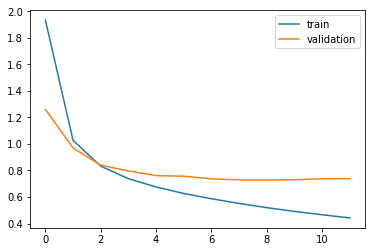

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

As you can see in the above plot, the validation loss stopped decreasing after 10 epochs.

Finally, we can load the saved model and make predictions on the unseen data – testY.

In [67]:
#Load Weights file
weightsfile= "model.h1.13_apr_19"

#FInd the number of the epoch from the file name
model.load_weights(weightsfile)

# compile network
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')


model.fit(trainY[0:10000], trainX[0:10000].reshape(trainX[0:10000].shape[0], trainX[0:10000].shape[1], 1),epochs=1, 
           batch_size=512, validation_split = 0.1, verbose=1)
# fit network
# model.fit(trainY, trainX.reshape(trainX.shape[0], trainX.shape[1], 1),epochs=1, 
 #         batch_size=512, validation_split = 0.1,callbacks=[checkpoint], verbose=1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/1
9000/9000 [==============================] - 128s 14ms/step - loss: 0.4790 - val_loss: 0.4844


In [70]:
model = load_model('model.h1.13_apr_19')
preds = model.predict_classes(testY[0:1000].reshape((testY[0:1000].shape[0],testY[0:1000].shape[1])))

These predictions are sequences of integers.
We need to convert these integers to their corresponding words. Let’s define a function to do this:

In [71]:
def get_word(n, tokenizer):
      for word, index in tokenizer.word_index.items():
          if index == n:
              return word
      return None

Convert predictions into text (Hindi)

In [72]:
preds_text = []
for i in preds:
       temp = []
       for j in range(len(i)):
            t = get_word(i[j], hin_tokenizer)
            if j > 0:
                if (t == get_word(i[j-1], hin_tokenizer)) or (t == None):
                     temp.append('')
                else:
                     temp.append(t)
            else:
                   if(t == None):
                          temp.append('')
                   else:
                          temp.append(t) 

       preds_text.append(' '.join(temp))

In [92]:
pred_df = pd.DataFrame({'actual' : test[0:1000][:,1], 'predicted' : preds_text})

We can randomly print some actual vs predicted instances to see how our model performs:

In [93]:
# print 15 rows randomly
pred_df.sample(10)

,actual,predicted
357,क्या मुझे सौदा मिला है,मुझे एक मिल है
891,इस लेख के लिए एक साक्षात्कार,इस लेख के लिए एक साक्षात्कार
822,विषय के साथ रखने में,विषय के साथ रखते में
895,फिल्म की है,फिल्म की है
838,सेक्स करने के बारे में सामाजिक मानदंड,सेक्स बनाने के बारे में सेक्स
859,आप एक के साथ समाप्त हो गया,आप एक के साथ समाप्त हो गया
964,लेकिन ऐसा नहीं लगता,लेकिन ऐसा नहीं लगता
636,के साथ गति नहीं रखा है,के साथ गति नहीं है
861,कोई भी नहीं जानता कि क्या हुआ,कोई भी लिए नहीं क्या जानता
123,हालांकि यह नहीं था,हालांकि यह नहीं था


Our Seq2Seq model does a decent job. But there are several instances where it misses out on understanding the key words.